In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
null_counts = df.isna().sum()

In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')


In [ ]:
num_cols = ["Adult_Mortality", "Alcohol", "Hepatitis_B", "Polio", "Diphtheria",
            "Total_expenditure", "GDP", "Population", "thinness_5-9_years",
            "thinness__1-19_years", "Income_composition_of_resources", "Schooling"]

for col in num_cols:
    df[col] = df.groupby("Country")[col].transform(lambda x: x.fillna(x.median()))

In [ ]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Display final null values to verify
print(df.isnull().sum())

Country                             0
Year                                0
Status                              0
Life_expectancy                    10
Adult_Mortality                     0
infant_deaths                       0
Alcohol                             0
percentage_expenditure              0
Hepatitis_B                         0
Measles                             0
BMI                                34
under-five_deaths                   0
Polio                               0
Total_expenditure                   0
Diphtheria                          0
HIV/AIDS                            0
GDP                                 0
Population                          0
thinness__1-19_years                0
thinness_5-9_years                  0
Income_composition_of_resources     0
Schooling                           0
dtype: int64


In [ ]:
df = df.dropna(subset=["BMI"])
df = df.dropna(subset=["Life_expectancy"])
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2896 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2896 non-null   object 
 1   Year                             2896 non-null   int64  
 2   Status                           2896 non-null   object 
 3   Life_expectancy                  2896 non-null   float64
 4   Adult_Mortality                  2896 non-null   float64
 5   infant_deaths                    2896 non-null   int64  
 6   Alcohol                          2896 non-null   float64
 7   percentage_expenditure           2896 non-null   float64
 8   Hepatitis_B                      2896 non-null   float64
 9   Measles                          2896 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five_deaths                2896 non-null   int64  
 12  Polio                    

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

print(df[['Country', 'Country_encoded']].head())
df["Status"] = df["Status"].map({"Developing": 0, "Developed": 1})
Country = df.pop("Country")

       Country  Country_encoded
0  Afghanistan                0
1  Afghanistan                0
2  Afghanistan                0
3  Afghanistan                0
4  Afghanistan                0


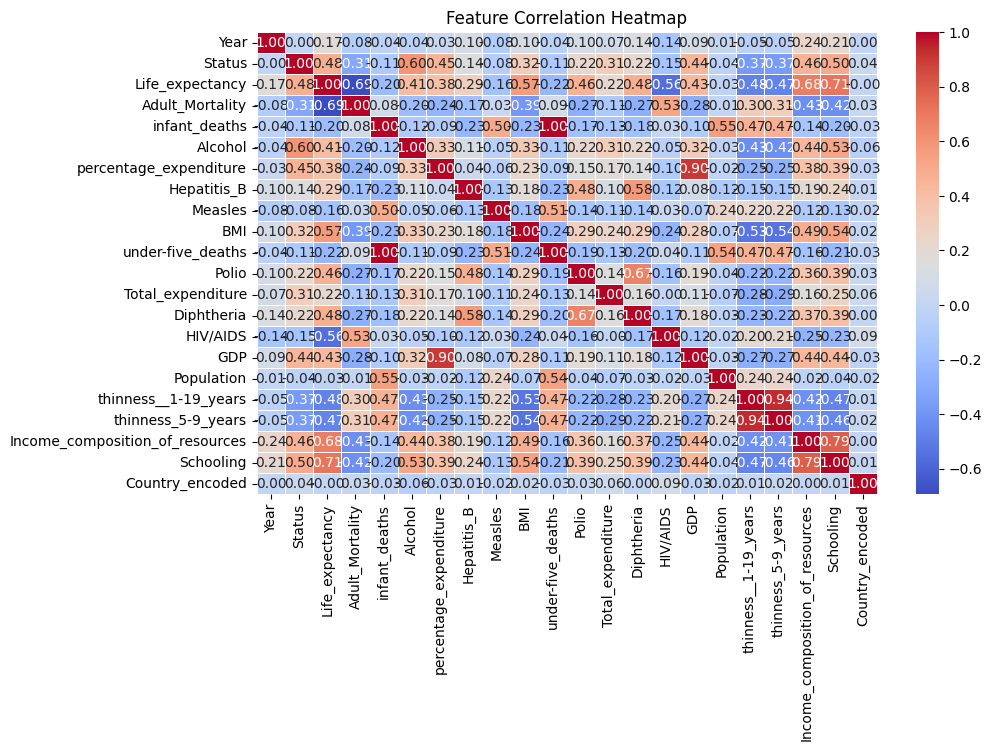

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.pop('infant_deaths')
df.pop('thinness_5-9_years')
df.pop('thinness__1-19_years')
df.pop('percentage_expenditure')
df.pop('Year')
df.pop('Country_encoded')

,Country_encoded
0,0
1,0
2,0
3,0
4,0
...,...
2933,180
2934,180
2935,180
2936,180


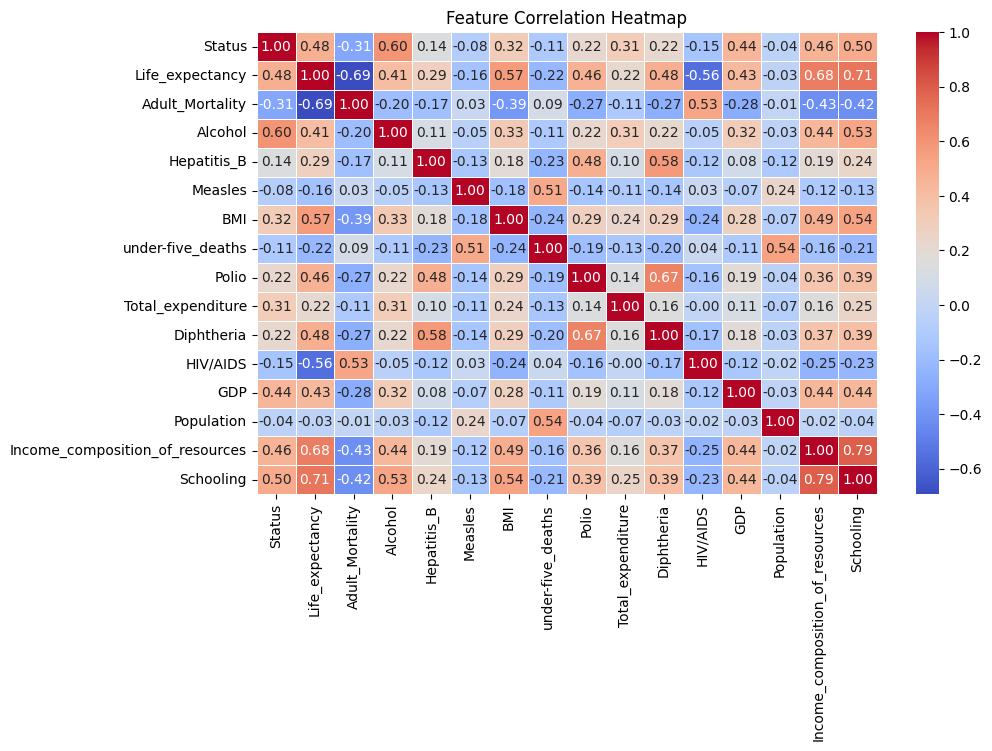

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
le = df.pop("Life_expectancy")
df["Life_Expectancy"] = le

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=68)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
test_predict=regressor.predict(x_test)
train_predict=regressor.predict(x_train)

In [ ]:
mse_train = mean_squared_error(y_train, train_predict)
mse_test = mean_squared_error(y_test, test_predict)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate R² score
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

print("Training Set Performance:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")

print("\nTest Set Performance:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

Training Set Performance:
Mean Squared Error (MSE): 17.1279
Root Mean Squared Error (RMSE): 4.1386
R² Score: 0.8076

Test Set Performance:
Mean Squared Error (MSE): 18.1507
Root Mean Squared Error (RMSE): 4.2604
R² Score: 0.8063


In [ ]:
residuals=y_test-test_predict

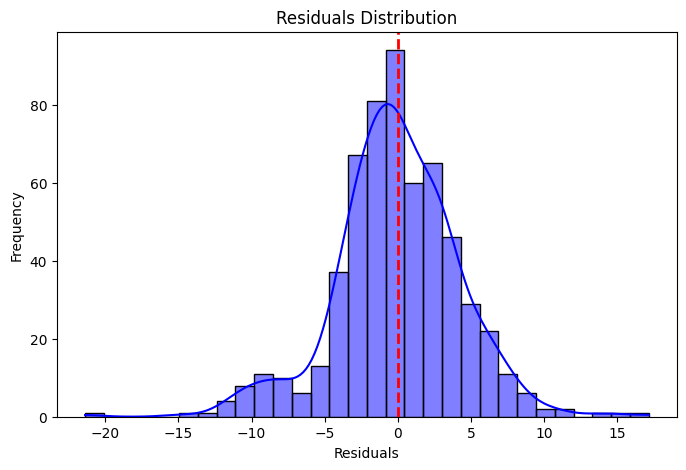

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='dashed', linewidth=2)  # Vertical line at zero
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

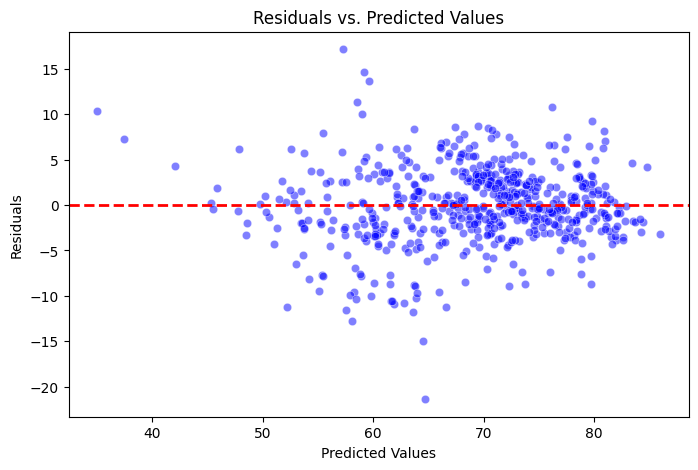

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=test_predict, y=residuals, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='dashed', linewidth=2)  # Reference line at zero
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

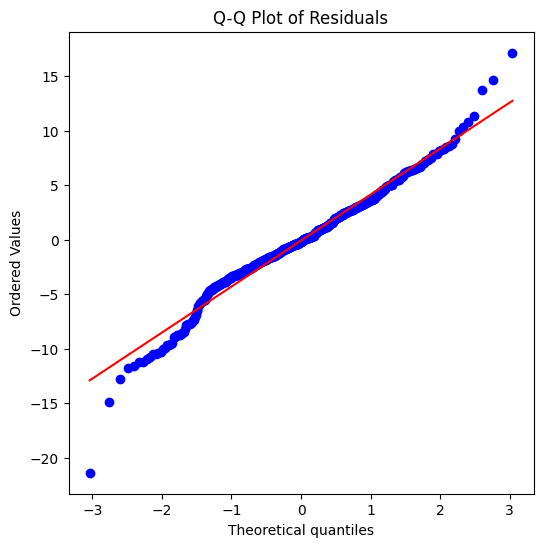

In [ ]:
import scipy.stats as stats
import numpy as np

plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
alphas = np.logspace(-3, 3, 100)  # 100 values from 10^-3 to 10^3
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(x_train, y_train)
print(ridge_cv.alpha_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.82263e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.26086e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.11187e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.55646e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

0.8111308307896873


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.48519e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.01698e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.08677e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.18582e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

In [ ]:
print(ridge_cv.alpha_)

0.8111308307896873


In [ ]:
test_predict1=ridge_cv.predict(x_test)
train_predict1=ridge_cv.predict(x_train)
mse_train = mean_squared_error(y_train, train_predict1)
mse_test = mean_squared_error(y_test, test_predict1)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate R² score
r2_train = r2_score(y_train, train_predict1)
r2_test = r2_score(y_test, test_predict1)

print("Training Set Performance:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")

print("\nTest Set Performance:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

Training Set Performance:
Mean Squared Error (MSE): 17.1283
Root Mean Squared Error (RMSE): 4.1386
R² Score: 0.8075

Test Set Performance:
Mean Squared Error (MSE): 18.1365
Root Mean Squared Error (RMSE): 4.2587
R² Score: 0.8064


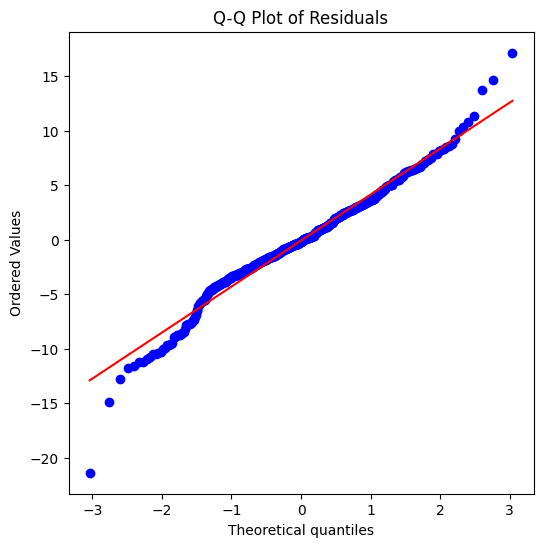

In [ ]:
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso = LassoCV(alphas=alphas, cv=5, max_iter=5000)
lasso.fit(x_train, y_train)
lasso_best_alpha = lasso.alpha_

In [ ]:
test_predict2=lasso.predict(x_test)
train_predict2=lasso.predict(x_train)
mse_train = mean_squared_error(y_train, train_predict2)
mse_test = mean_squared_error(y_test, test_predict2)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate R² score
r2_train = r2_score(y_train, train_predict1)
r2_test = r2_score(y_test, test_predict1)

print("Training Set Performance:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")

print("\nTest Set Performance:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

Training Set Performance:
Mean Squared Error (MSE): 17.1281
Root Mean Squared Error (RMSE): 4.1386
R² Score: 0.8075

Test Set Performance:
Mean Squared Error (MSE): 18.1407
Root Mean Squared Error (RMSE): 4.2592
R² Score: 0.8064


In [ ]:
print(f"Best alpha for Ridge: {ridge_cv.alpha_}")
print(f"Best alpha for Lasso: {lasso.alpha_}")

Best alpha for Ridge: 0.8111308307896873
Best alpha for Lasso: 0.001747528400007683


In [ ]:
x_train.shape

(2316, 15)

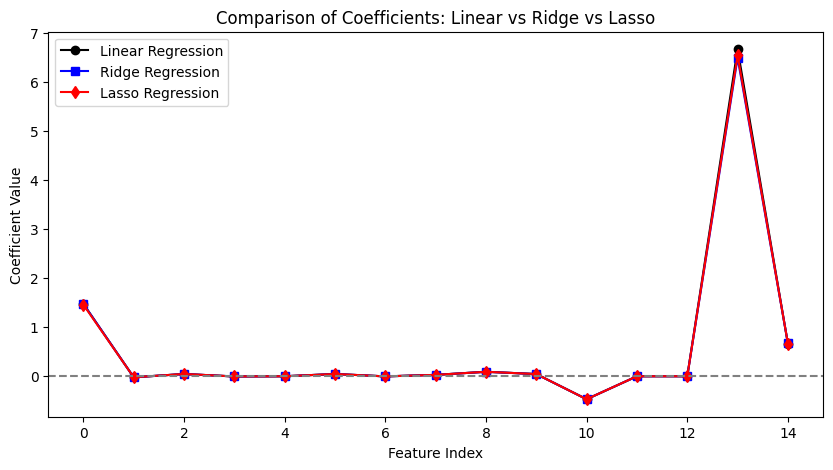

In [ ]:
# Get coefficients from each model
coef_linear = regressor.coef_
coef_ridge = ridge_cv.coef_
coef_lasso = lasso.coef_

# Plot them
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(coef_linear)), coef_linear, 'o-', label="Linear Regression", color="black")
plt.plot(np.arange(len(coef_ridge)), coef_ridge, 's-', label="Ridge Regression", color="blue")
plt.plot(np.arange(len(coef_lasso)), coef_lasso, 'd-', label="Lasso Regression", color="red")

plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Coefficients: Linear vs Ridge vs Lasso")
plt.legend()
plt.show()
